In [ ]:
!pip install PTAfast

## Testing gravity with cosmic variance-limited PTA measurements

In [ ]:
import os # requires *full path*

%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes # for insets, if needed

import numpy as np
from PTAfast.tensor import Tensor
from PTAfast.vector import Vector
from PTAfast.scalar import ScalarL as SL
from PTAfast.scalar import ScalarT as ST
from PTAfast.hellingsdowns import HellingsDowns as HD

from scipy.optimize import minimize

In this notebook we look at cosmic-variance limited stochastic gravitational wave background (SGWB) power spectrum measurements that are realizable in alternative theories of gravity. We pay attention to their deviations from the traditional Hellings-Downs (HD) curve anchored in general relativity (GR).

To begin, we draw the HD correlation below:

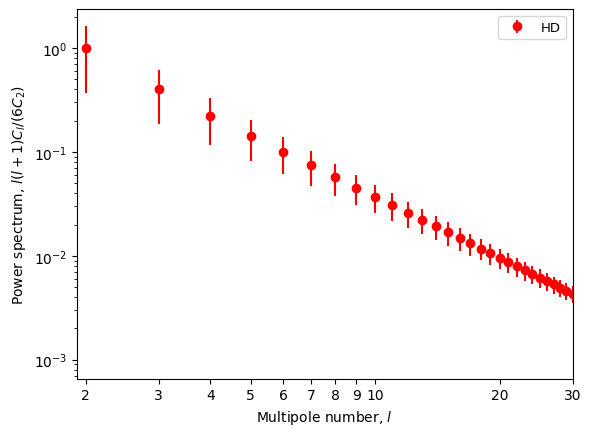

In [ ]:
# setup reference HD
lMax = 60
cls_hd = HD(lm = lMax).get_cls()

def clv(l, cl):
    return cl*np.sqrt(2/(2*l + 1))

fix, ax = plt.subplots()
clv_hd = clv(cls_hd[:, 0], cls_hd[:, 1])
ll1cl_hd = cls_hd[:, 0]*(cls_hd[:, 0] + 1)*cls_hd[:, 1]
ll1c2_hd = ll1cl_hd[0]
ll1clv_hd = cls_hd[:, 0]*(cls_hd[:, 0] + 1)*clv_hd
ax.errorbar(cls_hd[:, 0], y = ll1cl_hd/ll1c2_hd, yerr = ll1clv_hd/ll1c2_hd, \
            color = 'red', fmt = 'o', label = 'HD')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'upper right', prop = {'size': 9.5})
ax.set_xlabel(r'Multipole number, $l$')
ax.set_ylabel(r'Power spectrum, $l(l+1)C_l/(6C_2)$')
# set the x-axis tick locations and labels
ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)
ax.set_xlim(1.9, 30)
plt.show()

Now we setup a code that returns the SGWB angular power spectrum for tensor modes. We shall use this to draw the corresponding CV limited power spectra.

In [ ]:
def cls_T(v):
    '''Tensor power spectrum for GW speed v with fixed distance fD'''
    ps = Tensor(lm = lMax, v = v, fD = 1000).get_cls()
    return ps

The CV limited power spectra for the HD and relativistic tensor GWs are shown below.

At v =  1.0 xi =  9.482111303558029e-10
At v =  0.6 xi =  12.258135676185026
At v =  0.2 xi =  13.622829627675063


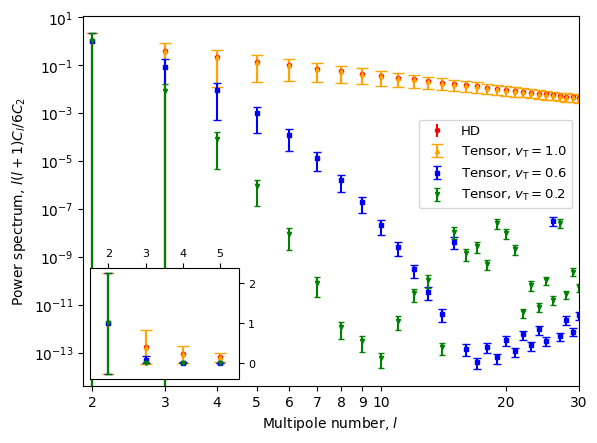

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(cls_hd[:, 0], y = ll1cl_hd/ll1c2_hd, yerr = 2*ll1clv_hd/ll1c2_hd, \
            color = 'red', fmt = 'o', markersize=3, label = 'HD')

# Add the inset plot
inset_ax = inset_axes(ax, width="30%", height="30%", loc='lower left')
inset_ax.errorbar(cls_hd[:, 0], y = ll1cl_hd/ll1c2_hd, yerr = 2*ll1clv_hd/ll1c2_hd, \
                  color='red', fmt='o', markersize=3)

# Tensor correlation
vlst = [1.0, 0.6, 0.2]
clrs = ['orange', 'blue', 'green']
lsty = ['--', '-.', ':']
htch = ['/', '\\', '-']
fmts = ['^', 's', 'v']
caps = [4, 3, 2]
for v in vlst:
    i = vlst.index(v)
    lbl = r'Tensor, $v_{\rm T} =$' + str(v)
    Cls = cls_T(v)
    DCls = clv(Cls[:, 0], Cls[:, 1])
    ll1Cl = Cls[:, 0]*(Cls[:, 0] + 1)*Cls[:, 1]
    ll1C2 = ll1Cl[0]
    ll1DCl = Cls[:, 0]*(Cls[:, 0] + 1)*DCls
    ax.errorbar(Cls[:, 0], y = ll1Cl/ll1C2, yerr = 2*ll1DCl/ll1C2, \
                color = clrs[i], fmt = fmts[i], markersize = 3, capsize = caps[i], \
                label = lbl)
    inset_ax.errorbar(Cls[:, 0], y = ll1Cl/ll1C2, yerr = 2*ll1DCl/ll1C2, \
                      color = clrs[i], fmt = fmts[i], markersize = 3, \
                      capsize = caps[i])
    L = 5
    dev = Cls[:, 1][:L - 1] - cls_hd[:, 1][:L - 1]
    print('At v = ', v, 'xi = ', sum((dev**2)/(clv_hd[:L - 1]**2 + DCls[:L - 1]**2)))

ax.set_xscale('log') # axes properties
ax.set_yscale('log')
legend = ax.legend(loc='center right', prop = {'size': 9.5})
legend.set_bbox_to_anchor((1.0, 0.6))
ax.set_xlabel(r'Multipole number, $l$')
ax.set_ylabel(r'Power spectrum, $l(l + 1)C_l/6C_2$')
# set the x-axis tick locations and labels
ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)
ax.set_xlim(1.9, 30)
inset_ax.set_xlim(1.5, 5.5)
inset_ax.set_xticks([2, 3, 4, 5])
inset_ax.set_xticklabels([2, 3, 4, 5])
inset_ax.xaxis.tick_top()
inset_ax.yaxis.tick_right()
# Adjust font sizes in the inset plot
inset_ax.tick_params(axis='both', labelsize=8)
plt.show()

We also consider vector GWs. We similarly setup the next function that gives its power spectrum multipoles.

In [ ]:
def cls_V(v):
    '''Vector power spectrum for GW speed v with fixed distance fD'''
    ps = Vector(lm = lMax, v = v, fD = 1000).get_cls()
    return ps

The vector GWs cosmic variance limited power spectra are shown below together with the HD.

At v =  1.0 xi =  14.739640918427654
At v =  0.6 xi =  12.040010476763573
At v =  0.2 xi =  15.038717755873748


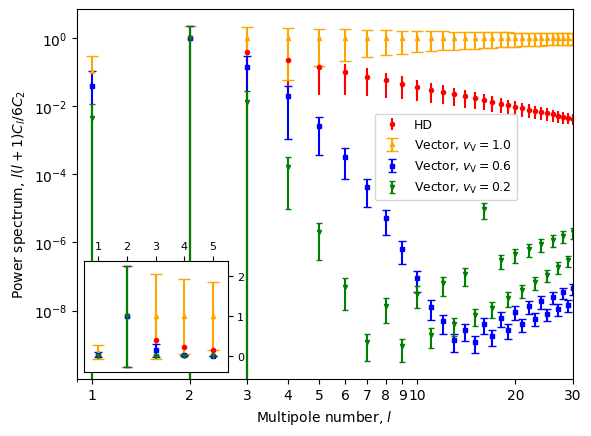

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(cls_hd[:, 0], y = ll1cl_hd/ll1c2_hd, yerr = 2*ll1clv_hd/ll1c2_hd, \
            color = 'red', fmt = 'o', markersize=3, label = 'HD')

# Add the inset plot
inset_ax = inset_axes(ax, width="29%", height="30%", loc='lower left')
inset_ax.errorbar(cls_hd[:, 0], y = ll1cl_hd/ll1c2_hd, yerr = 2*ll1clv_hd/ll1c2_hd, \
                  color='red', fmt='o', markersize=3)

# Tensor correlation
vlst = [1.0, 0.6, 0.2]
clrs = ['orange', 'blue', 'green']
lsty = ['--', '-.', ':']
htch = ['/', '\\', '-']
fmts = ['^', 's', 'v']
caps = [4, 3, 2]
for v in vlst:
    i = vlst.index(v)
    lbl = r'Vector, $v_{\rm V} =$' + str(v)
    Cls = cls_V(v)
    DCls = clv(Cls[:, 0], Cls[:, 1])
    ll1Cl = Cls[:, 0]*(Cls[:, 0] + 1)*Cls[:, 1]
    ll1C2 = ll1Cl[1] # this is a vector so the 0th element is for l = 1
    ll1DCl = Cls[:, 0]*(Cls[:, 0] + 1)*DCls
    ax.errorbar(Cls[:, 0], y = ll1Cl/ll1C2, yerr = 2*ll1DCl/ll1C2, \
                color = clrs[i], fmt = fmts[i], markersize = 3, capsize = caps[i], \
                label = lbl)
    inset_ax.errorbar(Cls[:, 0], y = ll1Cl/ll1C2, yerr = 2*ll1DCl/ll1C2, \
                      color = clrs[i], fmt = fmts[i], markersize = 3, \
                      capsize = caps[i])
    L = 5
    dev = Cls[:, 1][1:L] - cls_hd[:, 1][:L - 1] # for l >= 2
    wgt = clv_hd[:L - 1]**2 + DCls[1:L]**2
    dev_l1 = Cls[:, 1][0] # l = 1, no contrib from HD
    wgt_l1 = DCls[0]**2
    print(r'At v = ', v, 'xi = ', sum((dev**2)/wgt) + (dev_l1**2)/wgt_l1)

ax.set_xscale('log') # axes properties
ax.set_yscale('log')
legend = ax.legend(loc='center right', prop = {'size': 8.9})
legend.set_bbox_to_anchor((0.9, 0.6))
ax.set_xlabel(r'Multipole number, $l$')
ax.set_ylabel(r'Power spectrum, $l(l + 1)C_l/6C_2$')
# set the x-axis tick locations and labels
ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)
ax.set_xlim(0.9, 30)
inset_ax.set_xlim(0.5, 5.5)
inset_ax.set_xticks([1, 2, 3, 4, 5])
inset_ax.set_xticklabels([1, 2, 3, 4, 5])
inset_ax.xaxis.tick_top()
inset_ax.yaxis.tick_right()
# Adjust font sizes in the inset plot
inset_ax.tick_params(axis='both', labelsize=8)
plt.show()

Now the scalar modes are quite particular. In this case, we derive the projection factors of the longitudinal and transverse modes and mix them up the way they should in a relativistic scalar field theory. This is given below as well as the correponding power spectrum expression.

In [ ]:
def FF_phi(v, l, fD):
    '''Galileon projection factor for GW speed v with fixed distance'''
    ff_st = ST(lm = lMax, v = v, fD = fD).F_ST(l)
    ff_sl = SL(lm = lMax, v = v, fD = fD).F_SL(l)
    mix = (1 - v**2)/np.sqrt(2)
    return ff_st + mix*ff_sl

def cls_phi(v):
    Cls = []
    for l in np.arange(0, lMax + 1, 1):
        ff_phi = FF_phi(v = v, l = l, fD = 1000)
        cl = 32*(np.pi**2)*(ff_phi*np.conj(ff_phi))/(np.sqrt(4*np.pi))
        Cls.append([l, cl.real])
    return np.array(Cls)

The plot of the cosmic variance limited power spectra for the scalar modes are shown below. We print this together with the corresponding dipole-to-monopole ratios which are the dominant modes in scalar GWs.

At v =  1.0 xi =  17.99991489015077
C0/C1 =  9.000000911891295
At v =  0.6 xi =  17.99980141162689
C0/C1 =  24.99997776564747
At v =  0.2 xi =  17.998383070443484
C0/C1 =  224.96966092743733


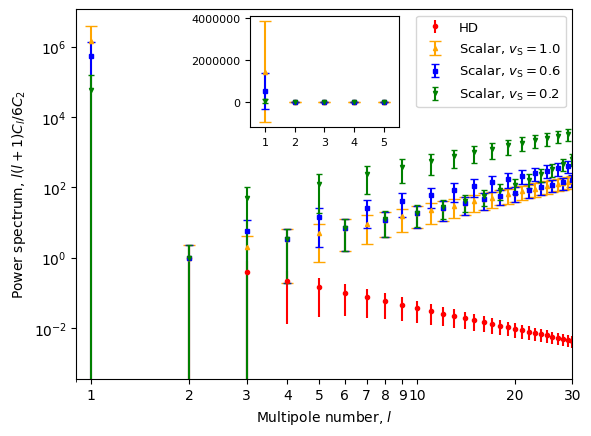

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(cls_hd[:, 0], y = ll1cl_hd/ll1c2_hd, yerr = 2*ll1clv_hd/ll1c2_hd, \
            color = 'red', fmt = 'o', markersize=3, label = 'HD')

# Add the inset plot
inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper center')
inset_ax.errorbar(cls_hd[:, 0], y = ll1cl_hd/ll1c2_hd, yerr = 2*ll1clv_hd/ll1c2_hd, \
                  color='red', fmt='o', markersize=3)

# Tensor correlation
vlst = [1.0, 0.6, 0.2]
clrs = ['orange', 'blue', 'green']
lsty = ['--', '-.', ':']
htch = ['/', '\\', '-']
fmts = ['^', 's', 'v']
caps = [4, 3, 2]
for v in vlst:
    i = vlst.index(v)
    lbl = r'Scalar, $v_{\rm S} =$' + str(v)
    Cls = cls_phi(v)
    DCls = clv(Cls[:, 0], Cls[:, 1])
    ll1Cl = Cls[:, 0]*(Cls[:, 0] + 1)*Cls[:, 1]
    ll1C2 = ll1Cl[2]
    ll1DCl = Cls[:, 0]*(Cls[:, 0] + 1)*DCls
    ax.errorbar(Cls[:, 0], y = ll1Cl/ll1C2, yerr = 2*ll1DCl/ll1C2, \
                color = clrs[i], fmt = fmts[i], markersize = 3, capsize = caps[i], \
                label = lbl)
    inset_ax.errorbar(Cls[:, 0], y = ll1Cl/ll1C2, yerr = 2*ll1DCl/ll1C2, \
                      color = clrs[i], fmt = fmts[i], markersize = 3, \
                      capsize = caps[i])
    L = 5
    dev = Cls[:, 1][2:L + 1] - cls_hd[:, 1][:L - 1] # for l >= 2
    wgt = clv_hd[:L - 1]**2 + DCls[2:L + 1]**2
    dev_l0 = Cls[:, 1][0] # l = 0, no contrib from HD
    wgt_l0 = DCls[0]**2
    dev_l1 = Cls[:, 1][1] # l = 1, no contrib from HD
    wgt_l1 = DCls[1]**2
    print('At v = ', v, 'xi = ', sum((dev**2)/wgt) + ((dev_l1**2)/wgt_l1) + ((dev_l0**2)/wgt_l0))
    print('C0/C1 = ', Cls[:, 1][0]/Cls[:, 1][1])

ax.set_xscale('log') # axes properties
ax.set_yscale('log')
ax.legend(loc = 'upper right', prop = {'size': 9.5})
ax.set_xlabel(r'Multipole number, $l$')
ax.set_ylabel(r'Power spectrum, $l(l + 1)C_l/6C_2$')
# set the x-axis tick locations and labels
ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)
ax.set_xlim(0.9, 30)
inset_ax.set_xlim(0.5, 5.5)
inset_ax.set_xticks([1, 2, 3, 4, 5])
inset_ax.set_xticklabels([1, 2, 3, 4, 5])
inset_ax.xaxis.tick_bottom()
inset_ax.yaxis.tick_left()
inset_ax.ticklabel_format(style='plain', axis='y')
inset_ax.tick_params(axis='both', labelsize=8)
plt.show()

At this point, we want to put the deviations of the power spectrum from the HD in a firm ground. We consider then a metric:

\begin{equation}
\xi(v) = \sum_{l} \dfrac{ \left( C_l - \overline{C}_l\right)^2 }{ \Delta C_l^2 + \Delta \overline{C}_l^2 }
\end{equation}

We setup functions below that evaluate this for the tensor, vector, and scalar modes.

In [ ]:
def xi_T(v, lM = 5):
    xi = []
    for vi in v:
        Cls = Tensor(lm = lM, v = vi, fD = 1000).get_cls()
        DCls = clv(Cls[:, 0], Cls[:, 1])
        dev = Cls[:, 1][:lM - 1] - cls_hd[:, 1][:lM - 1]
        wgt = clv_hd[:lM - 1]**2 + DCls[:lM - 1]**2
        xi.append(sum((dev**2)/wgt))
    return np.array(xi)

def xi_V(v, lM = 5):
    xi = []
    for vi in v:
        Cls = Vector(lm = lM, v = vi, fD = 1000).get_cls()
        DCls = clv(Cls[:, 0], Cls[:, 1])
        dev = Cls[:, 1][1:lM] - cls_hd[:, 1][:lM - 1] # for l >= 2
        wgt = clv_hd[:lM - 1]**2 + DCls[1:lM]**2
        dev_l1 = Cls[:, 1][0] # l = 1, no contrib from HD
        wgt_l1 = DCls[0]**2
        xi.append(sum((dev**2)/wgt) + (dev_l1**2)/wgt_l1)
    return np.array(xi)

def xi_S(v, lM=5):
    xi = []
    for vi in v:
        Cls = []
        for l in np.arange(0, lM + 1, 1):
            ff_phi = FF_phi(v=vi, l=l, fD=1000)
            cl = 32 * (np.pi ** 2) * (ff_phi * np.conj(ff_phi)) / (np.sqrt(4 * np.pi))
            Cls.append([l, cl.real])
        Cls = np.array(Cls)

        Cls = Vector(lm=lM, v=vi, fD=1000).get_cls()
        DCls = clv(Cls[:, 0], Cls[:, 1])
        dev_l0 = Cls[:, 1][0]  # l = 0, no contrib from HD
        wgt_l0 = DCls[0] ** 2
        dev_l1 = Cls[:, 1][1]  # l = 1, no contrib from HD
        wgt_l1 = DCls[1] ** 2
        dev = Cls[:, 1][2:] - cls_hd[:, 1][:lM - 2]  # for l >= 2
        wgt = clv_hd[:lM - 2] ** 2 + DCls[2:] ** 2
        xi.append(sum((dev ** 2) / wgt) + ((dev_l1 ** 2) / wgt_l1) + ((dev_l0 ** 2) / wgt_l0))
    return np.array(xi)

We evalute these in the next line.

In [ ]:
vr = np.linspace(0.1, 1, 200)
xi_Tvr = xi_T(vr)
xi_Vvr = xi_V(vr)
xi_Svr = xi_S(vr)

Now here's the corresponding plot that we overlay with the graviton masses for inferencing purposes.

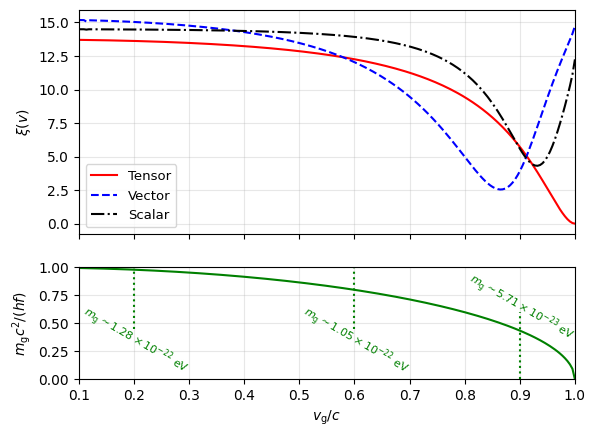

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

ax1.plot(vr, xi_Tvr, 'r-', label = 'Tensor')
ax1.plot(vr, xi_Vvr, 'b--', label = 'Vector')
ax1.plot(vr, xi_Svr, 'k-.', label = 'Scalar')
ax1.set_ylabel(r'$\xi(v)$')
ax1.legend(loc = 'lower left', prop = {'size': 9.5})
ax1.grid(True, alpha = 0.3)

ax2.plot(vr, np.sqrt(1 - vr**2), 'g-')
ax2.set_ylabel(r'$m_{\rm g} c^2 / ( h f )$')
ax2.grid(True, alpha = 0.3)
ax2.set_ylim(0, 1)

ax2.axvline(x = 0.9, ymin = 0, ymax = 0.6, color = 'green', ls = ':')
ax2.text(0.8, 0.3, r'$m_{\rm g} \sim 5.71\times10^{-23} \ {\rm eV}$',
         color='green', fontsize=8, verticalalignment='bottom', rotation = -30)

ax2.axvline(x = 0.6, ymin = 0.45, ymax = 1, color = 'green', ls = ':')
ax2.text(0.5, 0.0, r'$m_{\rm g} \sim 1.05\times10^{-22} \ {\rm eV}$',
         color='green', fontsize=8, verticalalignment='bottom', rotation = -30)

ax2.axvline(x = 0.2, ymin = 0.45, ymax = 1, color = 'green', ls = ':')
ax2.text(0.1, 0.0, r'$m_{\rm g} \sim 1.28\times10^{-22} \ {\rm eV}$',
         color='green', fontsize=8, verticalalignment='bottom', rotation = -30)

# joined axis
ax2.set_xlabel(r'$v_{\rm g}/c$')
ax2.set_xlim(min(vr), 1)

plt.show()

A different metric we can consider for scientific inferencing are the ratios of the power spectrum multipoles with respect to the dominant one. We do so in what follows up to the quintupole. This is setup up in the next line.

In [ ]:
def cls5_T(v):
    '''Tensor power spectrum for GW speed v with fixed distance fD = 500'''
    ps = Tensor(lm = 5, v = v, fD = 1000).get_cls()
    return ps

def cls5_V(v):
    '''Vector power spectrum for GW speed v with fixed distance fD = 500'''
    ps = Vector(lm = 5, v = v, fD = 1000).get_cls()
    return ps

def cls5_phi(v):
    Cls = []
    lmax = 2
    for l in np.arange(0, lmax + 1, 1):
        ff_phi = FF_phi(v = v, l = l, fD = 1000)
        cl = 32*(np.pi**2)*(ff_phi*np.conj(ff_phi))/(np.sqrt(4*np.pi))
        Cls.append([l, cl.real])
    return np.array(Cls)

The evaluations are performed below. We note that for the scalar, all $C_l$ with $l \geq 2$ are nonvanishing only due to environmental factors. In this case, we take only the ratio of $C_0/C_1$.

In [ ]:
vr = np.linspace(0.1, 1, 100)
c3c2_T = []
c4c2_T = []
c5c2_T = []

c1c2_V = []
c3c2_V = []
c4c2_V = []
c5c2_V = []

c1c0_phi = []
for v in vr:
    # tensors
    cls5_t = cls5_T(v)[:, 1]
    cls5_v = cls5_V(v)[:, 1]
    cls5_s = cls5_phi(v)[:, 1]

    c3c2_T.append(cls5_t[1]/cls5_t[0])
    c4c2_T.append(cls5_t[2]/cls5_t[0])
    c5c2_T.append(cls5_t[3]/cls5_t[0])

    c1c2_V.append(cls5_v[0]/cls5_v[1])
    c3c2_V.append(cls5_v[2]/cls5_v[1])
    c4c2_V.append(cls5_v[3]/cls5_v[1])
    c5c2_V.append(cls5_v[4]/cls5_v[1])

    c1c0_phi.append(cls5_s[1]/cls5_s[0])

c3c2_T = np.array(c3c2_T)
c4c2_T = np.array(c4c2_T)
c5c2_T = np.array(c5c2_T)

c1c2_V = np.array(c1c2_V)
c3c2_V = np.array(c3c2_V)
c4c2_V = np.array(c4c2_V)
c5c2_V = np.array(c5c2_V)

c1c0_phi = np.array(c1c0_phi)

The power spectrum ratios are shown below for tensor, vector, and scalar GWs.

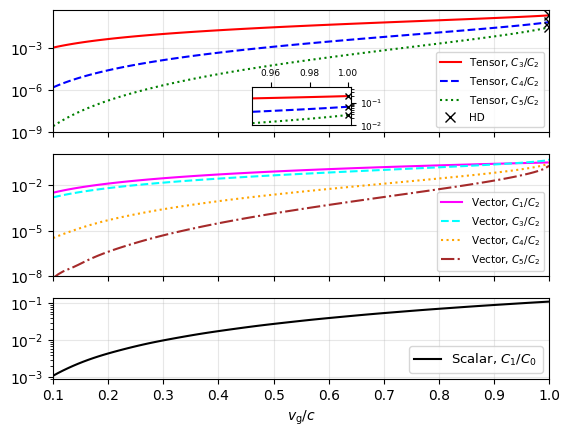

In [ ]:
vr = np.linspace(0.1, 1, 100)

# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [3, 3, 2]})

# tensors
ix1 = inset_axes(ax1, width="20%", height="31%", loc='lower center')

ax1.plot(vr, c3c2_T, linestyle='-', color='red', label=r'Tensor, $C_3/C_2$')
ax1.plot(vr, c4c2_T, linestyle='--', color='blue', label=r'Tensor, $C_4/C_2$')
ax1.plot(vr, c5c2_T, linestyle=':', color='green', label=r'Tensor, $C_5/C_2$')
ax1.plot(1, cls_hd[:,1][1]/cls_hd[:,1][0], 'kx', markersize = 7)
ax1.plot(1, cls_hd[:,1][2]/cls_hd[:,1][0], 'kx', markersize = 7)
ax1.plot(1, cls_hd[:,1][3]/cls_hd[:,1][0], 'kx', markersize = 7, label = 'HD')
ax1.set_yscale('log')
ax1.set_ylim(bottom = 1e-9)
ax1.legend(loc = 'lower right', prop = {'size': 7.5})
ax1.grid(True, alpha = 0.3)

ix1.plot(vr, c3c2_T, linestyle='-', color='red')
ix1.plot(vr, c4c2_T, linestyle='--', color='blue')
ix1.plot(vr, c5c2_T, linestyle=':', color='green')
ix1.plot(1, cls_hd[:,1][1]/cls_hd[:,1][0], 'kx', markersize = 5)
ix1.plot(1, cls_hd[:,1][2]/cls_hd[:,1][0], 'kx', markersize = 5)
ix1.plot(1, cls_hd[:,1][3]/cls_hd[:,1][0], 'kx', markersize = 5)
ix1.set_yscale('log')
ix1.set_ylim(bottom = 1e-2)
ix1.set_xlim(0.95, 1.0013)
ix1.xaxis.tick_top()
ix1.yaxis.tick_right()
ix1.tick_params(axis='both', labelsize=6.5)

# vectors
ax2.plot(vr, c1c2_V, linestyle='-', color='magenta', label=r'Vector, $C_1/C_2$')
ax2.plot(vr, c3c2_V, linestyle='--', color='cyan', label=r'Vector, $C_3/C_2$')
ax2.plot(vr, c4c2_V, linestyle=':', color='orange', label=r'Vector, $C_4/C_2$')
ax2.plot(vr, c5c2_V, linestyle='-.', color='brown', label=r'Vector, $C_5/C_2$')
ax2.set_yscale('log')
ax2.set_ylim(bottom = 1e-8)
ax2.legend(loc = 'lower right', prop = {'size': 7.5})
ax2.grid(True, alpha = 0.3)

# scalars
ax3.plot(vr, c1c0_phi, linestyle='-', color='black', label=r'Scalar, $C_1/C_0$')
ax3.set_yscale('log')
ax3.legend(loc = 'lower right', prop = {'size': 9.5})

ax3.set_xlim(min(vr), max(vr))
ax3.set_xlabel(r'$v_{\rm g}/c$')
ax3.grid(True, alpha = 0.3)

plt.show()

End of notebook